In [1]:
import pandas as pd

true_results = pd.read_csv('strain_table.txt', sep='\t', index_col=0,
                          dtype={'Outbreak number': str})
true_results['Outbreak number'].head(3)

Strain
SH12-001    1
SH12-002    1
SH12-003    1
Name: Outbreak number, dtype: object

In [48]:
from ete3 import Tree, NodeStyle, TreeStyle, TextFace
import matplotlib.pyplot as plt
import io

def get_tree_image(file):
    tree = Tree(file)
    tree.set_outgroup('SH12-013')

    ts = TreeStyle()
    ts.show_leaf_name = True
    if file == 'snvphyl-tree.txt':
        ts.scale = 100
    else:
        ts.scale = 100000
    ts.mode = 'c'
    ts.legend.add_face(TextFace(file), column=1)

    styles = {}
    nsize = 10

    nstyled = NodeStyle()
    nstyled["fgcolor"] = "lightgray"
    nstyled['size'] = nsize
    
    nstyle1 = NodeStyle()
    nstyle1["fgcolor"] = "#1b9e77"
    nstyle1['size'] = nsize
    styles['1'] = nstyle1

    nstyle2 = NodeStyle()
    nstyle2["fgcolor"] = "#d95f02"
    nstyle2['size'] = nsize
    styles['2'] = nstyle2

    nstyle3 = NodeStyle()
    nstyle3["fgcolor"] = "#7570b3"
    nstyle3['size'] = nsize
    styles['3'] = nstyle3

    # Applies the same static style to all nodes in the tree. Note that,
    # if "nstyle" is modified, changes will affect to all nodes
    for n in tree.traverse():
        if n.name in true_results['Outbreak number']:
            outbreak_number = true_results['Outbreak number'][n.name]
            if outbreak_number in styles:
                nstyle = styles[outbreak_number]
                n.set_style(nstyle)
                n.name = f'{outbreak_number}_{n.name}'
            else:
                n.set_style(nstyled)

    return tree.render("%%inline", tree_style=ts, w=600)

trees = {}
for t in ['tree-1000.txt', 'tree-10000.txt', 'tree-100000.txt', 'snvphyl-tree.txt']:
    trees[t] = plt.imread(io.BytesIO(get_tree_image(t).data))

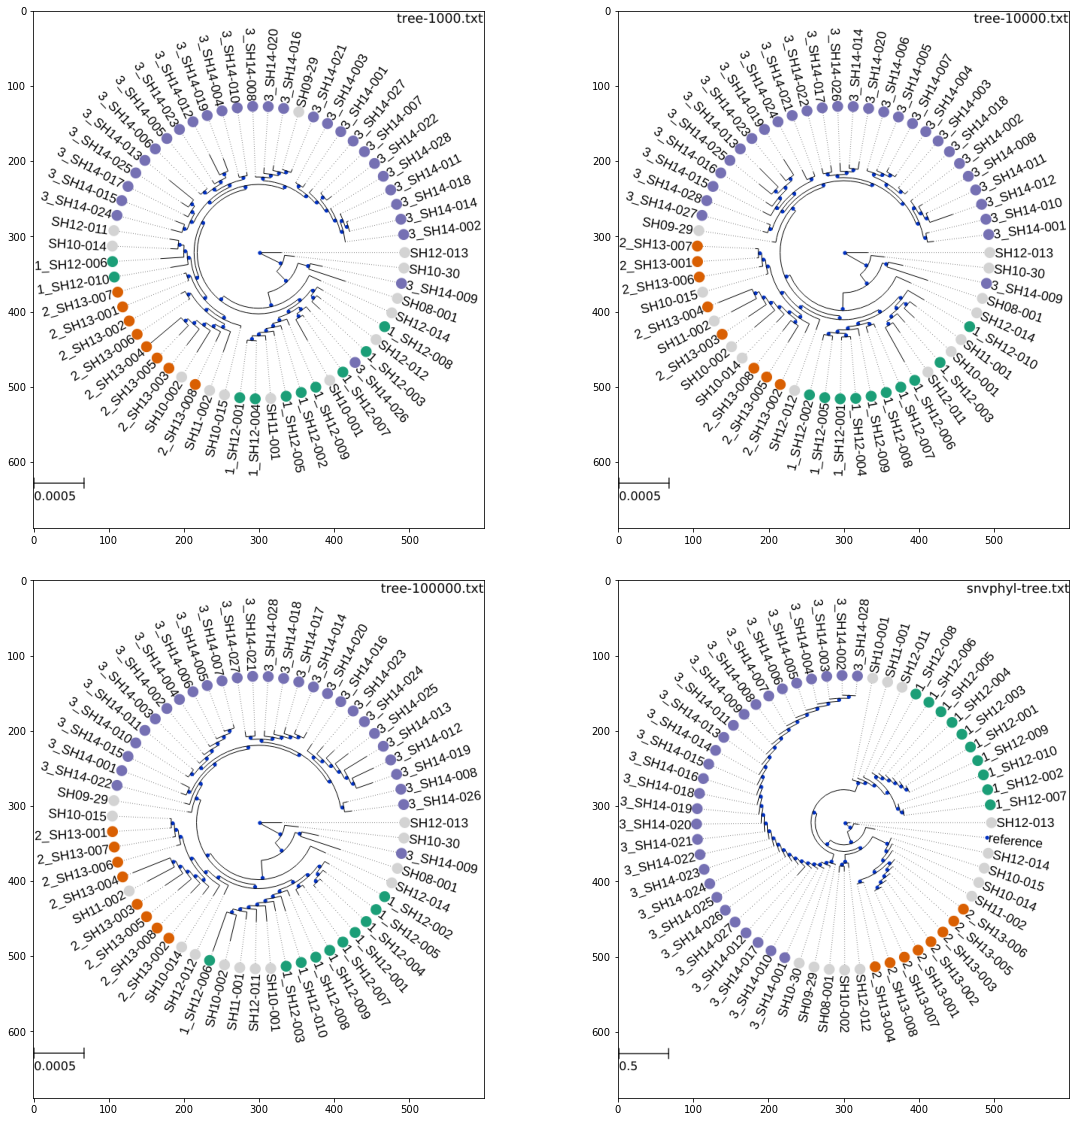

In [49]:
f, axarr = plt.subplots(2,2, figsize=(20,20))
plt.subplots_adjust(hspace=0.1, wspace=0.1)
axarr[0,0].imshow(trees['tree-1000.txt'])
axarr[0,1].imshow(trees['tree-10000.txt'])
axarr[1,0].imshow(trees['tree-100000.txt'])
axarr[1,1].imshow(trees['snvphyl-tree.txt'])

plt.show()